# practice 3. 다중 선형 회귀, ridge, lasso

데이터 셋 링크: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

펭귄들의 종, 서식 지역, 부리 길이와 부리 깊이, 날개(?) 사이즈, 성별, 그리고 몸무게 데이터 셋이 있습니다. 다중 회귀 분석, 라쏘, 릿지 리그레션을 이용해서 몸무게를 예측하는 회귀 모델을 만들고, 어떤 독립변수가 가장 몸무게에 영향을 많이 미치는지 찾아보세요.

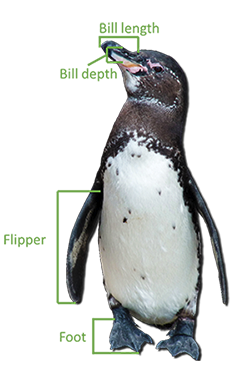

In [141]:
import pandas as pd

In [142]:
from utils import load_penguin_dataset

x_train, x_test, y_train, y_test = load_penguin_dataset()

In [143]:
x_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
225,Gentoo,Biscoe,46.5,13.5,210.0,FEMALE
119,Adelie,Torgersen,41.1,18.6,189.0,MALE
181,Chinstrap,Dream,52.8,20.0,205.0,MALE
167,Chinstrap,Dream,50.5,19.6,201.0,MALE
226,Gentoo,Biscoe,45.4,14.6,211.0,FEMALE
...,...,...,...,...,...,...
205,Chinstrap,Dream,50.7,19.7,203.0,MALE
54,Adelie,Biscoe,34.5,18.1,187.0,FEMALE
295,Gentoo,Biscoe,48.6,16.0,230.0,MALE
212,Chinstrap,Dream,51.9,19.5,206.0,MALE


In [ ]:
x_train.isnull().sum()

In [ ]:
x_train['sex'].value_counts()

In [144]:
x_train[x_train['sex'].isin(['MALE','FEMALE']) == False].index

Index([336, 324, 10, 9, 47, 286, 246, 11], dtype='int64')

In [ ]:
x_train = x_train.drop([336, 324, 10, 9, 47, 286, 246, 11])
x_train

In [ ]:
y_train = y_train.drop([336, 324, 10, 9, 47, 286, 246, 11])
y_train

In [147]:
species_dummies = pd.get_dummies(x_train['species'],prefix='species')
island_dummies = pd.get_dummies(x_train['island'],prefix='island')
sex_dummies = pd.get_dummies(x_train['sex'],prefix='sex')

x_train = pd.concat([x_train,species_dummies.astype(int)],axis=1)
x_train = pd.concat([x_train,island_dummies.astype(int)],axis=1)
x_train = pd.concat([x_train,sex_dummies.astype(int)],axis=1)

x_train = x_train.drop(['species','island','sex'],axis=1)
x_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
225,46.5,13.5,210.0,0,0,1,1,0,0,1,0
119,41.1,18.6,189.0,1,0,0,0,0,1,0,1
181,52.8,20.0,205.0,0,1,0,0,1,0,0,1
167,50.5,19.6,201.0,0,1,0,0,1,0,0,1
226,45.4,14.6,211.0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
205,50.7,19.7,203.0,0,1,0,0,1,0,0,1
54,34.5,18.1,187.0,1,0,0,1,0,0,1,0
295,48.6,16.0,230.0,0,0,1,1,0,0,0,1
212,51.9,19.5,206.0,0,1,0,0,1,0,0,1


In [148]:
species_dummies = pd.get_dummies(x_test['species'],prefix='species')
island_dummies = pd.get_dummies(x_test['island'],prefix='island')
sex_dummies = pd.get_dummies(x_test['sex'],prefix='sex')

x_test = pd.concat([x_test,species_dummies.astype(int)],axis=1)
x_test = pd.concat([x_test,island_dummies.astype(int)],axis=1)
x_test = pd.concat([x_test,sex_dummies.astype(int)],axis=1)

x_test = x_test.drop(['species','island','sex'],axis=1)
x_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
65,41.6,18.0,192.0,1,0,0,1,0,0,0,1
311,52.2,17.1,228.0,0,0,1,1,0,0,0,1
264,50.5,15.9,222.0,0,0,1,1,0,0,0,1
98,33.1,16.1,178.0,1,0,0,0,1,0,1,0
38,37.6,19.3,181.0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
343,49.9,16.1,213.0,0,0,1,1,0,0,0,1
327,53.4,15.8,219.0,0,0,1,1,0,0,0,1
296,47.5,14.2,209.0,0,0,1,1,0,0,1,0
41,40.8,18.4,195.0,1,0,0,0,1,0,0,1


In [149]:
x_train['weight'] = y_train

<Axes: >

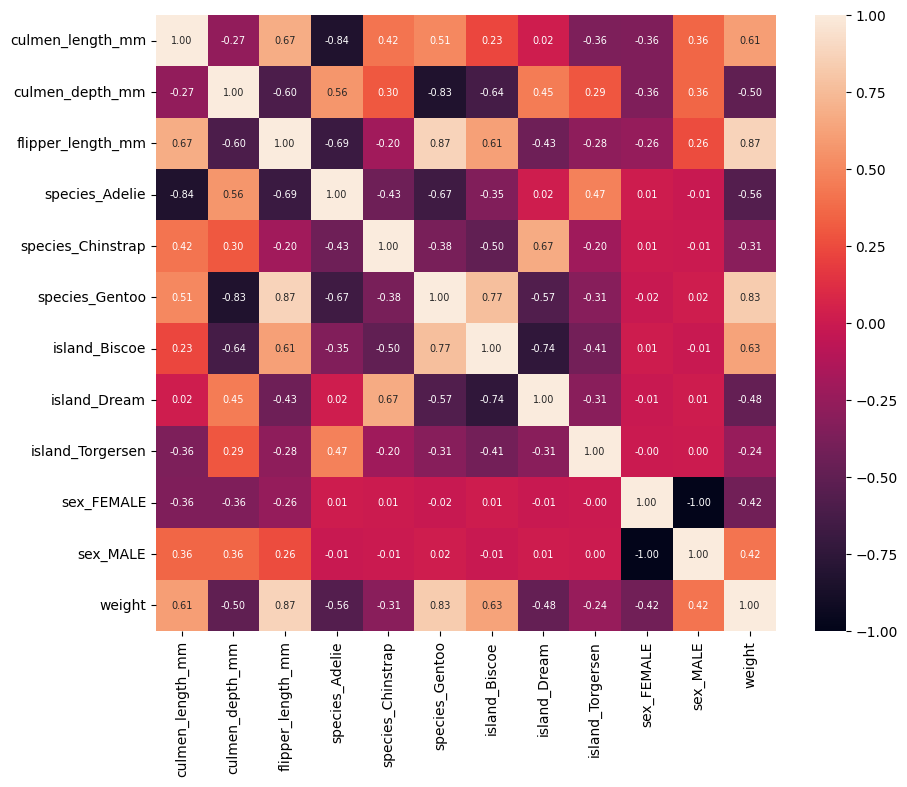

In [171]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    x_train.corr(),
    annot = True,
    fmt = '.2f',
    annot_kws = {'size' : 7}
)

In [192]:
x_train.corr()['weight'].sort_values(ascending=False)

weight               1.000000
flipper_length_mm    0.874012
species_Gentoo       0.829839
island_Biscoe        0.632294
culmen_length_mm     0.608309
sex_MALE             0.421327
island_Torgersen    -0.243646
species_Chinstrap   -0.308335
sex_FEMALE          -0.421327
island_Dream        -0.481178
culmen_depth_mm     -0.500619
species_Adelie      -0.560033
Name: weight, dtype: float64

In [201]:
import statsmodels.api as sm

def train_multiple_linear_regression(X,y):
    X_constant = sm.add_constant(X,has_constant = 'add')
    model = sm.OLS(y,X_constant)
    results = model.fit()
    return results

In [202]:
x_cur_train = x_train[['flipper_length_mm','species_Gentoo']]
results = train_multiple_linear_regression(x_cur_train,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     472.9
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.14e-87
Time:                        22:37:21   Log-Likelihood:                -1949.5
No. Observations:                 265   AIC:                             3905.
Df Residuals:                     262   BIC:                             3916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3257.0073    652.199     -4.994      0.000   -4541.225   -1972.789
flipper_length_mm    36.2728      3.396     10.680      0.000      29.585      42.960
species_Gentoo      476.7065     99.049      4.813      0.000     281.674     671.739
==============================================================================
Omnibus:                        4.143   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.108
Skew:                           0.304   Prob(JB):                        0.128
Kurtosis:                       2.959   Cond. No.                     5.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF',ascending = False)

In [205]:
check_multi_colinearity(x_cur_train)

,Features,VIF
1,species_Gentoo,1.751156
0,flipper_length_mm,1.751156


In [206]:
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [207]:
x_cur_train = x_train[['flipper_length_mm','species_Gentoo']]
x_cur_test = x_test[['flipper_length_mm','species_Gentoo']]

model = LinearRegression()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.7586862593375299
RMSE 374.07655488003815
sum of abs coefficient 512.9792582698769


In [196]:
model = Lasso()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.7593242178487781
RMSE 373.5817565808749
sum of abs coefficient 496.02103601883454


In [197]:
model = Ridge()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.7597393711096119
RMSE 373.2594129222492
sum of abs coefficient 483.80269727739994


==============================================================================

In [208]:
x_cur_train = x_train[['flipper_length_mm','sex_MALE']]
results = train_multiple_linear_regression(x_cur_train,y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     542.8
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           6.74e-94
Time:                        22:38:27   Log-Likelihood:                -1935.0
No. Observations:                 265   AIC:                             3876.
Df Residuals:                     262   BIC:                             3887.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5490.1753    323.517    -16.970      0.000   -6127.200   -4853.150
flipper_length_mm    47.3948      1.629     29.091      0.000      44.187      50.603
sex_MALE            343.7630     45.875      7.493      0.000     253.433     434.093
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.432
Skew:                           0.067   Prob(JB):                        0.806
Kurtosis:                       2.854   Cond. No.                     2.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
check_multi_colinearity(x_cur_train)

,Features,VIF
0,flipper_length_mm,2.056307
1,sex_MALE,2.056307


In [212]:
x_cur_train = x_train[['flipper_length_mm','sex_MALE']]
x_cur_test = x_test[['flipper_length_mm','sex_MALE']]

model = LinearRegression()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

R2 score 0.8072932820052481
RMSE 334.28577122670066
sum of abs coefficient 391.1578452693591


In [ ]:
model = Lasso()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())

In [ ]:
model = Ridge()
model.fit(x_cur_train,y_train)
y_pred = model.predict(x_cur_test)
print('R2 score', r2_score(y_test,y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)))
print('sum of abs coefficient', np.abs(model.coef_).sum())